In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

=== mu: 1.0e-06 ===
[12.67959916] [0.24471145]
3.4000000000000004 2.7747897453528267
=== mu: 1.0e-05 ===
[13.41210261] [0.39400534]
3.3 2.906079020254518
=== mu: 1.0e-04 ===
[14.44515073] [0.35561256]
3.6699639700668656 2.870488092698172
=== mu: 1.0e-03 ===
[11.98806803] [0.26361936]
3.4000000000000004 2.708027954390557
[2.5, 2.5, 2.4, 2.1]
[3.4000000000000004, 3.3, 3.9000000000000004, 3.4000000000000004]
[3.4000000000000004, 3.3, 3.2, 3.4000000000000004]
[2.9, 3.1, 3.1, 2.7]


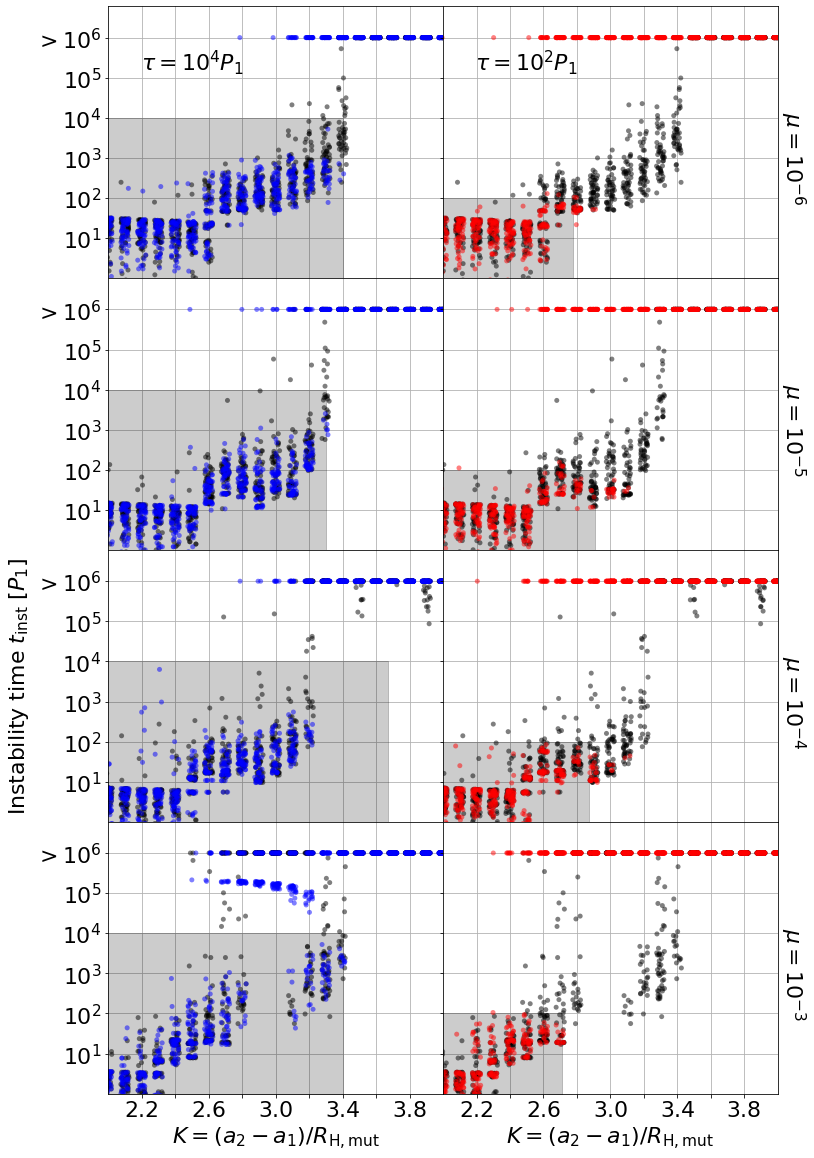

In [20]:
def Tins_fit_full(K,b,mu,K0,Kc):
    return  np.log(K_to_Tsyn(K,2*mu,mu) * np.exp(b*(K-K0)/K0))


def K_to_Tsyn(K,m1,m2):
    a1 = 1.
    eta = ((m1+m2)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

def resonance_to_K(res_val,m1,m2):
    P1 = 1.**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((m1+m2)/3.)**(1./3.)
    return (a2-a1)/RH


from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.0)

plt.rcParams.update({'font.size':22})

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']


dir_name_list = ['6','5','4','3']
mu_l = [1e-6,1e-5,1e-4,1e-3]
K0_l = [2.8,2.8,2.8,2.4]
Kc_l = [.0,.0,.0,.0]


for iii in range(len(dir_name_list)):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,4.0,21)
    
    coll_t = np.zeros((len(kk_list)))
    ejec_t = np.zeros((len(kk_list)))
    ejec_m = np.zeros((len(kk_list)))
    safe_t = np.zeros((len(kk_list)))
    mist_t = np.zeros((len(kk_list)))
    alpha_array = kk_list*0

    X_fit = np.array([])
    Y_fit = np.array([])
    
    mu = mu_l[iii]
    Tsyn_list = K_to_Tsyn(kk_list,2*mu,mu)
    
    for i in range(len(kk_list)):
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N2/m'+curr_dir+'t0T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        all_data = np.load(dir_name_str+'.npy')

        Nrun = len(all_data[:,0])

        RH_data = all_data[ all_data[:,1]>0.5 , : ]
        sf_data = all_data[ all_data[:,0]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            axs[iii,0].scatter(RH_time*0+kk_list[i]+(np.random.rand(len(RH_time))-0.5)*0.05,
                               RH_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
            axs[iii,1].scatter(RH_time*0+kk_list[i]+(np.random.rand(len(RH_time))-0.5)*0.05,
                               RH_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')

            
            N1T = np.sum(RH_time<Tsyn_list[i])
            Nin = np.sum(RH_time>0)
            
            if N1T > Nrun*0.80:
                K0_l[iii] = kk_list[i]
            
            if Nin > Nrun*0.00:
                Kc_l[iii] = max(kk_list[i],Kc_l[iii])
            
        if sf_data.ndim >= 2:
            sf_time = sf_data[:,3]
            axs[iii,0].scatter(sf_time*0+kk_list[i]+(np.random.rand(len(sf_time))-0.5)*0.05,
                               sf_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
            axs[iii,1].scatter(sf_time*0+kk_list[i]+(np.random.rand(len(sf_time))-0.5)*0.05,
                               sf_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')


    for i in range(len(kk_list)):
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N2/m'+curr_dir+'t0T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        all_data = np.load(dir_name_str+'.npy')

        RH_data = all_data[ all_data[:,1]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            
            N1T = np.sum(RH_time<Tsyn_list[i])
            Nin = np.sum(RH_time>0)
            
            if (kk>K0_l[iii]) and (kk<=Kc_l[iii]):
                    
                X_fit = np.append(X_fit,RH_time*0+kk_list[i])
                Y_fit = np.append(Y_fit,RH_time)   
                
    popt, pcov = curve_fit(Tins_fit, X_fit, np.log(Y_fit))
    kk_fit = np.linspace(K0_l[iii]+0.1,Kc_l[iii],11)
    #axs[iii,0].plot(kk_fit, np.exp(Tins_fit(kk_fit, *popt)), color='k', alpha=0.2, linewidth=3)#,label='fit: b=%5.3f' % tuple(popt))
    #axs[iii,1].plot(kk_fit, np.exp(Tins_fit(kk_fit, *popt)), color='k', alpha=0.2, linewidth=3)#,label='fit: b=%5.3f' % tuple(popt))
    #axs[iii,2].plot(kk_fit, np.exp(Tins_fit(kk_fit, *popt)), color='k', alpha=0.2, linewidth=3)#,label='fit: b=%5.3f' % tuple(popt))
    
    Kc2 = np.interp(1e2, np.exp(Tins_fit(kk_fit, *popt)),kk_fit)
    Kc3 = np.interp(1e3, np.exp(Tins_fit(kk_fit, *popt)),kk_fit)
    Kc4 = np.interp(1e4, np.exp(Tins_fit(kk_fit, *popt)),kk_fit)
    
    kk_f2 = np.linspace(1,Kc2,11)
    axs[iii,1].fill_between(kk_f2,kk_f2*0+1e-2,kk_f2*0+1e2,color='k',alpha=0.2)
    kk_f4 = np.linspace(1,Kc4,11)
    axs[iii,0].fill_between(kk_f4,kk_f4*0+1e-2,kk_f4*0+1e4,color='k',alpha=0.2)
    
    print('=== mu: %1.1e ===' %mu)
    print(popt,np.sqrt(np.diag(pcov)))
    print(Kc4,Kc2)
            
    axs[iii,0].grid()
    axs[iii,1].grid()
    
    axs[iii,0].set_axisbelow(True)
    axs[iii,1].set_axisbelow(True)
    
    axs[iii,0].set_yscale('log')
    axs[iii,1].set_yscale('log')
    
    axs[iii,0].set_ylim([1.0e0,6e5])
    axs[iii,1].set_ylim([1.0e0,6e5])
    
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e6])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
print(K0_l)
print(Kc_l)
Kc_l = [0,0,0,0]     
cuse = ['b','b','b','b','b']
    
for iii in range(4):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,4.0,21)
    
    coll_t = np.zeros((len(kk_list)))
    ejec_t = np.zeros((len(kk_list)))
    ejec_m = np.zeros((len(kk_list)))
    safe_t = np.zeros((len(kk_list)))
    mist_t = np.zeros((len(kk_list)))
    alpha_array = kk_list*0

    X_fit = np.array([])
    Y_fit = np.array([])
    
    mu = mu_l[iii]
    Tsyn_list = K_to_Tsyn(kk_list,2*mu,mu)
    
    for i in range(len(kk_list)):
        try:
            kk = kk_list[i]
            dir_str = str(int(kk*10))
            dir_name_str = './20220126/N2/m'+curr_dir+'t4T6/all_Tinst/Tinst-K'+dir_str
            #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
            all_data = np.load(dir_name_str+'.npy')

            Nrun = len(all_data[:,0])

            Kt_data = all_data[ all_data[:,2]>0.5 , : ]
            RH_data = all_data[ all_data[:,1]>0.5 , : ]
            sf_data = all_data[ all_data[:,0]>0.5 , : ]

            if RH_data.ndim >= 2:
                RH_time = RH_data[:,3]
                axs[iii,0].scatter(RH_time*0+kk_list[i]+(np.random.rand(len(RH_time))-0.5)*0.05,
                                   RH_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')

                N1T = np.sum(RH_time<Tsyn_list[i])
                Nin = np.sum(RH_time>0)

                if N1T > Nrun*0.9:
                    K0_l[iii] = kk_list[i]

                if Nin > Nrun*0.0:
                    Kc_l[iii] = max(kk_list[i],Kc_l[iii])

            if sf_data.ndim >= 2:
                sf_time = sf_data[:,3]
                axs[iii,0].scatter(sf_time*0+kk_list[i]+(np.random.rand(len(sf_time))-0.5)*0.05,
                                   sf_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
            if Kt_data.ndim >= 2:
                Kt_time = Kt_data[:,3]*0+1e5
                axs[iii,0].scatter(Kt_time*0+kk_list[i]+(np.random.rand(len(Kt_time))-0.5)*0.05,
                                   Kt_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
        except:
            axs[iii,0].scatter(kk,1e5,color=cuse[iii],s=135,marker='x')
    
print(Kc_l)
Kc_l = [0,0,0,0]   

cuse = ['r','r','r','r','r']

for iii in range(4):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,4.0,21)
    
    coll_t = np.zeros((len(kk_list)))
    ejec_t = np.zeros((len(kk_list)))
    ejec_m = np.zeros((len(kk_list)))
    safe_t = np.zeros((len(kk_list)))
    mist_t = np.zeros((len(kk_list)))
    alpha_array = kk_list*0

    X_fit = np.array([])
    Y_fit = np.array([])
    
    mu = mu_l[iii]
    Tsyn_list = K_to_Tsyn(kk_list,2*mu,mu)
    
    for i in range(len(kk_list)):
        
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N2/m'+curr_dir+'t2T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        all_data = np.load(dir_name_str+'.npy')

        Nrun = len(all_data[:,0])

        Kt_data = all_data[ all_data[:,2]>0.5 , : ]
        RH_data = all_data[ all_data[:,1]>0.5 , : ]
        sf_data = all_data[ all_data[:,0]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            axs[iii,1].scatter(RH_time*0+kk_list[i]+(np.random.rand(len(RH_time))-0.5)*0.05,
                                RH_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')

            N1T = np.sum(RH_time<Tsyn_list[i])
            Nin = np.sum(RH_time>0)

            if N1T > Nrun*0.9:
                K0_l[iii] = kk_list[i]

            if Nin > Nrun*0.0:
                Kc_l[iii] = max(kk_list[i],Kc_l[iii])

        if sf_data.ndim >= 2:
            sf_time = sf_data[:,3]
            axs[iii,1].scatter(sf_time*0+kk_list[i]+(np.random.rand(len(sf_time))-0.5)*0.05,
                                sf_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
        if Kt_data.ndim >= 2:
            Kt_time = Kt_data[:,3]*0+1e5
            axs[iii,1].scatter(Kt_time*0+kk_list[i]+(np.random.rand(len(Kt_time))-0.5)*0.05,
                                Kt_time,color=cuse[iii],s=25,alpha=0.5,edgecolors='none')
    
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([1.0e0,6e6])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    #axs[iii,2].legend(loc=1)
    axs[iii,1].text(4,1e3,r'$\mu=10^{-%d}$'%int(curr_dir),rotation=-90,va='center')
    
    
print(Kc_l)
cuse = ['g','g','g','g','g']
    



axs[0,0].text(2.5,1.6e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.5,1.6e5,r'$\tau=10^{2}P_1$',ha='center')
    
    
axs[3,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[3,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2,0].set_ylabel(r'Instability time $t_{\rm inst}$ [$P_1$]')

axs[iii,0].set_xlim([2.0,4.0])
axs[iii,1].set_xlim([2.0,4.0])

tks = np.linspace(2.2,3.8,9)

axs[2,0].set_xticks(tks)
axs[2,1].set_xticks(tks)

tks_mark = [2.2, 2.6, 3.0, 3.4, 3.8]
tks_label = []
for i in range(len(tks)):
    if tks[i] in tks_mark:
        tks_label.append('%1.1f' %tks[i])
    else:
        tks_label.append('')
    
axs[2,0].set_xticklabels(tks_label)

axs[0,0].set_yticklabels([r'$10^1$',r'$10^2$',r'$10^3$',r'$10^4$',r'$10^5$',r'$>10^6$'])
axs[1,0].set_yticklabels([r'$10^1$',r'$10^2$',r'$10^3$',r'$10^4$',r'$10^5$',r'$>10^6$'])
axs[2,0].set_yticklabels([r'$10^1$',r'$10^2$',r'$10^3$',r'$10^4$',r'$10^5$',r'$>10^6$'])


#axs.set_title(r'no friction, final $e/\epsilon>0.5$')

plt.rcParams.update({'font.size':22})


plt.savefig('./pics/pics-time_wf-N2-T6.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-N2-T6.png',bbox_inches='tight',transparent=True)

plt.rcParams.update({'font.size':22})


In [5]:
tks

array([2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8])